In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [74]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [75]:
df.shape

(5630, 20)

In [76]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [77]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [79]:
df['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

In [80]:
churn_rate = df['Churn'].value_counts()/len(df)*100
churn_rate

Churn
0    83.161634
1    16.838366
Name: count, dtype: float64

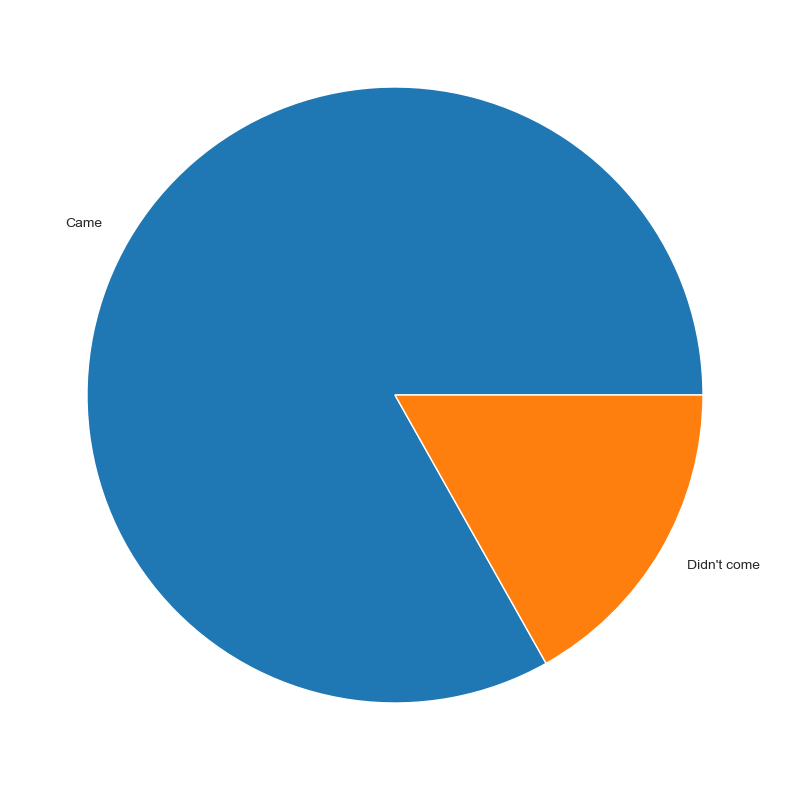

In [81]:
plt.figure(figsize=(10, 10))
plt.pie(churn_rate, labels=["Came", "Didn't come"])
plt.show()

In [82]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Text(0, 0.5, ' ')

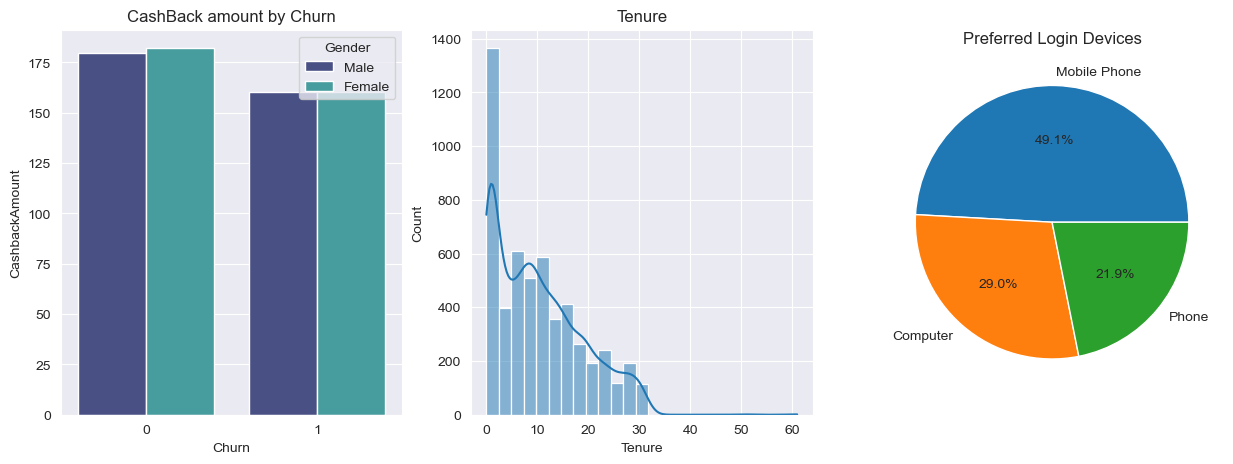

In [83]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

# Churn
sns.barplot(data=df, x='Churn', y='CashbackAmount', hue='Gender', palette='mako',  errorbar=None, ax=axes[0])
axes[0].set_title('CashBack amount by Churn')

# Tenure
sns.histplot(df['Tenure'], kde=True, bins=25, ax=axes[1])

axes[1].set_title('Tenure')

# Preferred login device
df['PreferredLoginDevice'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2])
axes[2].set_title('Preferred Login Devices')
axes[2].set_ylabel(" ")


Text(0.5, 1.0, 'Preferred Payment Mode Distribution')

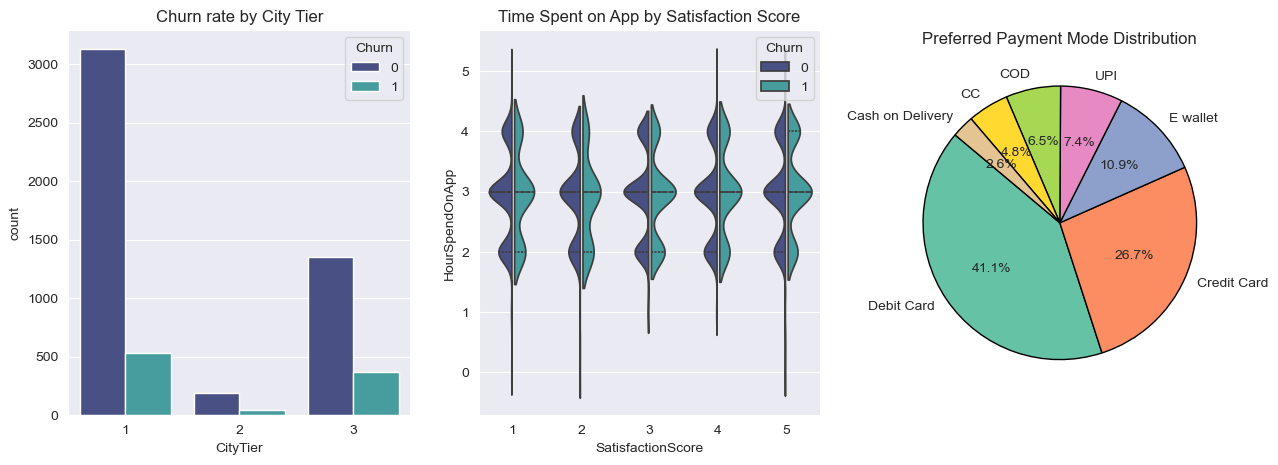

In [84]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

# CityTier
sns.countplot(data=df, x='CityTier', hue='Churn', palette='mako', ax=axes[0])
axes[0].set_title("Churn rate by City Tier")


# HourSpendOnApp
sns.violinplot(x='SatisfactionScore', y='HourSpendOnApp', hue='Churn', palette='mako', gap=.1, split=True, inner="quart", data=df, ax=axes[1])
axes[1].set_title('Time Spent on App by Satisfaction Score')

# PreferredPaymentMode
colors = sns.color_palette('Set2', len(df['PreferredPaymentMode'].value_counts()))
plt.pie(df['PreferredPaymentMode'].value_counts(), labels=df['PreferredPaymentMode'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[2].set_title("Preferred Payment Mode Distribution")

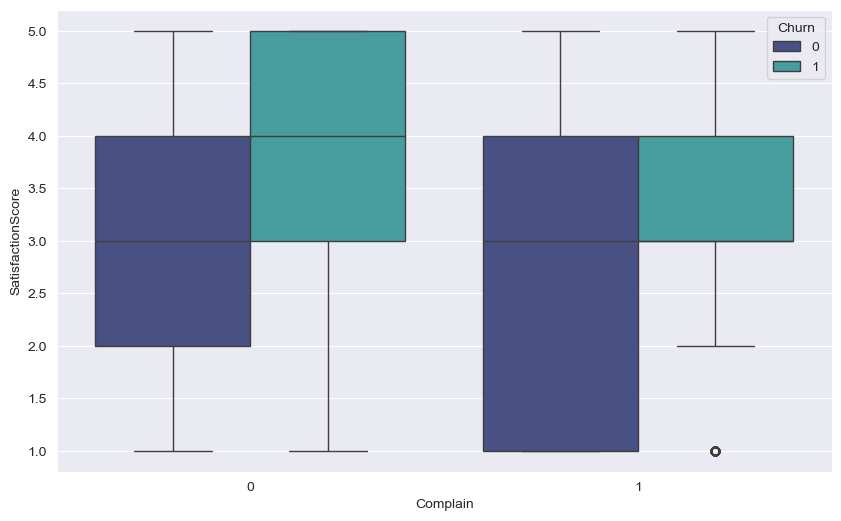

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Complain', y='SatisfactionScore', palette='mako', hue='Churn')
plt.show()

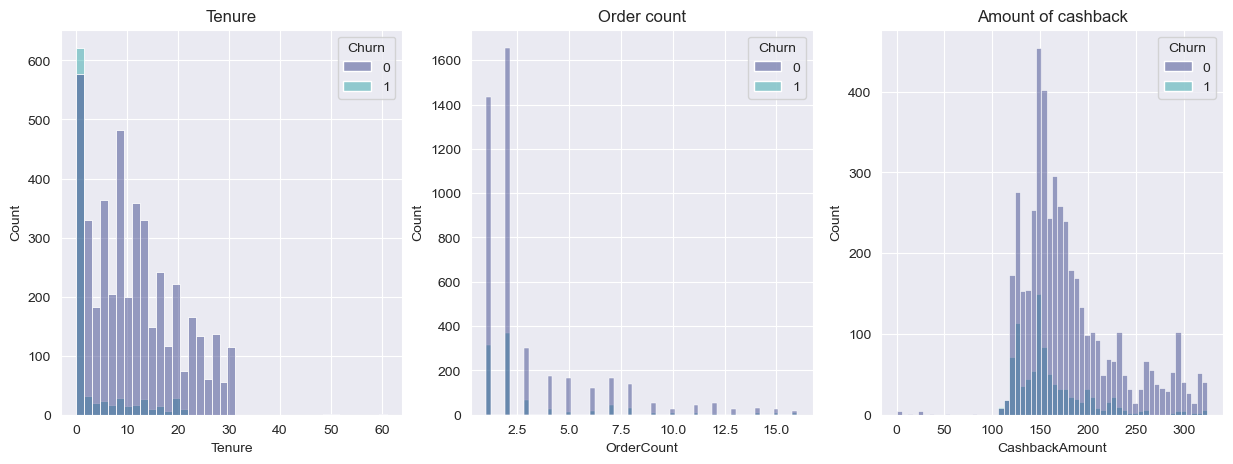

In [86]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="Tenure", hue='Churn', palette='mako', data=df, ax=axes[0])
axes[0].set_title("Tenure")

#OrderCount
sns.histplot(x="OrderCount", hue='Churn', palette='mako', data=df, ax=axes[1])
axes[1].set_title("Order count")

# Cashback
sns.histplot(x="CashbackAmount", hue='Churn', palette='mako', data=df, ax=axes[2])
axes[2].set_title("Amount of cashback")

plt.show()

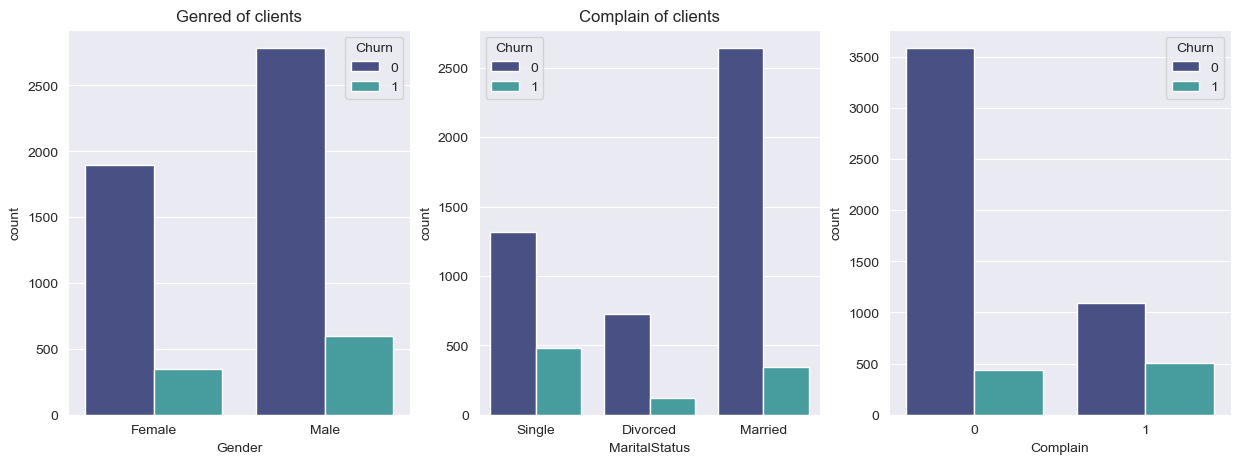

In [87]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Churn', palette='mako', data=df, ax=axes[0])
axes[0].set_title("Genred of clients")

sns.countplot(x='MaritalStatus', hue='Churn', palette='mako', data=df, ax=axes[1])
axes[1].set_title("Marital status of clients")

sns.countplot(x='Complain', hue='Churn', palette='mako', data=df, ax=axes[2])
axes[1].set_title("Complain of clients")

plt.show()

In [88]:
df_ = df.drop(columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'])
df_.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [89]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [90]:
# missing_rows = df[df.isnull().any(axis=1)].shape[0]
missing_rows = df.isnull().sum().sum()
missing_rows

1856

In [91]:
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"NaN values: {df.isnull().sum().sum()}")
print(f"Missing rows: {missing_rows}")
print(f"Missing rows percentage: {np.round(missing_rows/len(df)*100)}%")

NaN values: 1856
Missing rows: 1856
Missing rows percentage: 33.0%


In [92]:
data = df[['Churn', 'Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'MaritalStatus', 'Gender']]

In [93]:
data.isna().sum()

Churn                  0
Tenure               264
Complain               0
DaySinceLastOrder    307
CashbackAmount         0
MaritalStatus          0
Gender                 0
dtype: int64

In [94]:
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"NaN values: {data.isnull().sum().sum()}")
print(f"Missing rows: {missing_rows}")
print(f"Missing rows percentage: {np.round(missing_rows/len(data)*100)}%")

NaN values: 571
Missing rows: 571
Missing rows percentage: 10.0%


In [95]:
data = data.dropna()
data.shape

(5059, 7)

In [96]:
data['Churn'].value_counts()/len(data)

Churn
0    0.839296
1    0.160704
Name: count, dtype: float64

Preparation for ML

In [97]:
encoded = pd.get_dummies(data)
encoded

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1,4.0,1,5.0,159.93,False,False,True,True,False
3,1,0.0,0,3.0,134.07,False,False,True,False,True
4,1,0.0,0,3.0,129.60,False,False,True,False,True
5,1,0.0,1,7.0,139.19,False,False,True,True,False
8,1,13.0,1,2.0,126.83,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,0,1.0,154.66,False,False,True,True,False
5625,0,10.0,0,4.0,150.71,False,True,False,False,True
5627,0,1.0,1,4.0,186.42,False,True,False,False,True
5628,0,23.0,0,9.0,178.90,False,True,False,False,True


In [98]:
X = encoded.drop('Churn', axis=1)
y = encoded['Churn']

In [99]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.71161148,  1.57764556,  0.08883471, ...,  1.46230553,
         1.22303173, -1.22303173],
       [-1.17836145, -0.63385593, -0.45723432, ...,  1.46230553,
        -0.81764028,  0.81764028],
       [-1.17836145, -0.63385593, -0.45723432, ...,  1.46230553,
        -0.81764028,  0.81764028],
       ...,
       [-1.06167396,  1.57764556, -0.1841998 , ..., -0.68385162,
        -0.81764028,  0.81764028],
       [ 1.50545086, -0.63385593,  1.18097278, ..., -0.68385162,
        -0.81764028,  0.81764028],
       [-0.24486152, -0.63385593, -0.45723432, ..., -0.68385162,
        -0.81764028,  0.81764028]])

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Machine Learning

Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       849
           1       0.75      0.38      0.50       163

    accuracy                           0.88      1012
   macro avg       0.82      0.68      0.72      1012
weighted avg       0.87      0.88      0.86      1012

Accuracy score: 0.8794466403162056


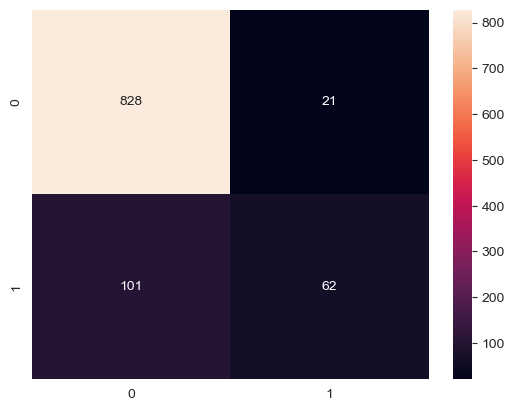

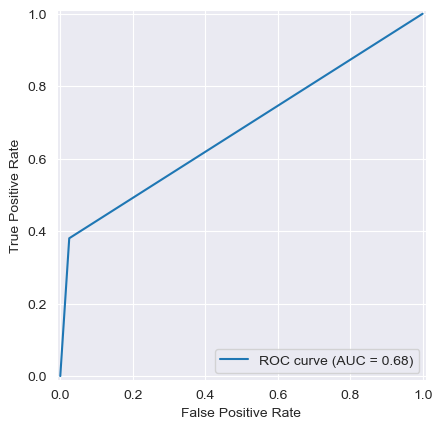

In [101]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Support Vector Machine (SVM)

D:\Users\user\anaconda3\envs\DS\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Users\user\anaconda3\envs\DS\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Users\user\anaconda3\envs\DS\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       849
           1       0.00      0.00      0.00       163

    accuracy                           0.84      1012
   macro avg       0.42      0.50      0.46      1012
weighted avg       0.70      0.84      0.77      1012

Model aniqligi: 0.8389328063241107


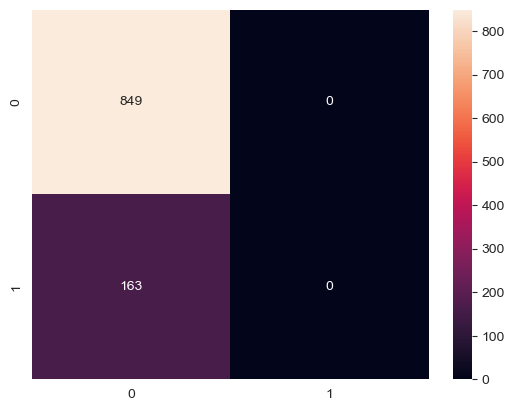

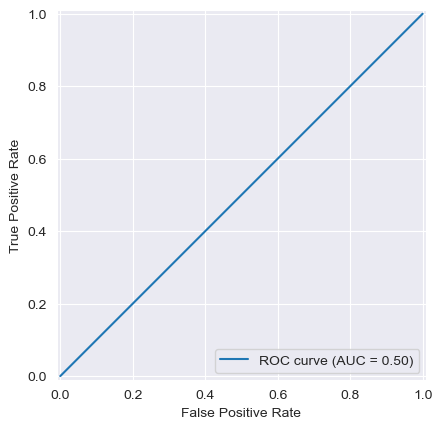

In [102]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.84      0.88      0.86       163

    accuracy                           0.95      1012
   macro avg       0.91      0.93      0.92      1012
weighted avg       0.96      0.95      0.95      1012

Accuracy Score: 0.9545454545454546


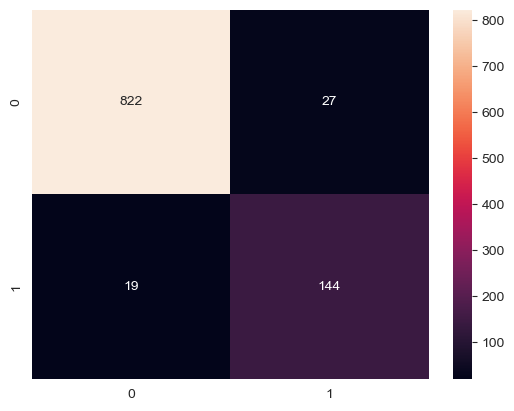

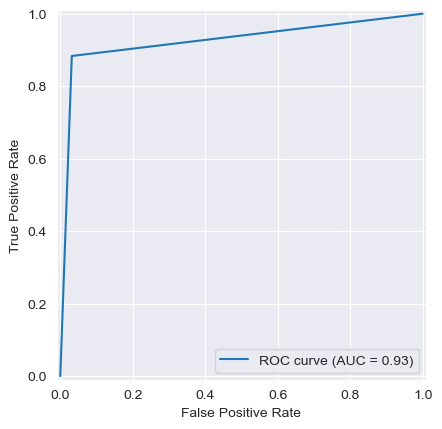

In [103]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

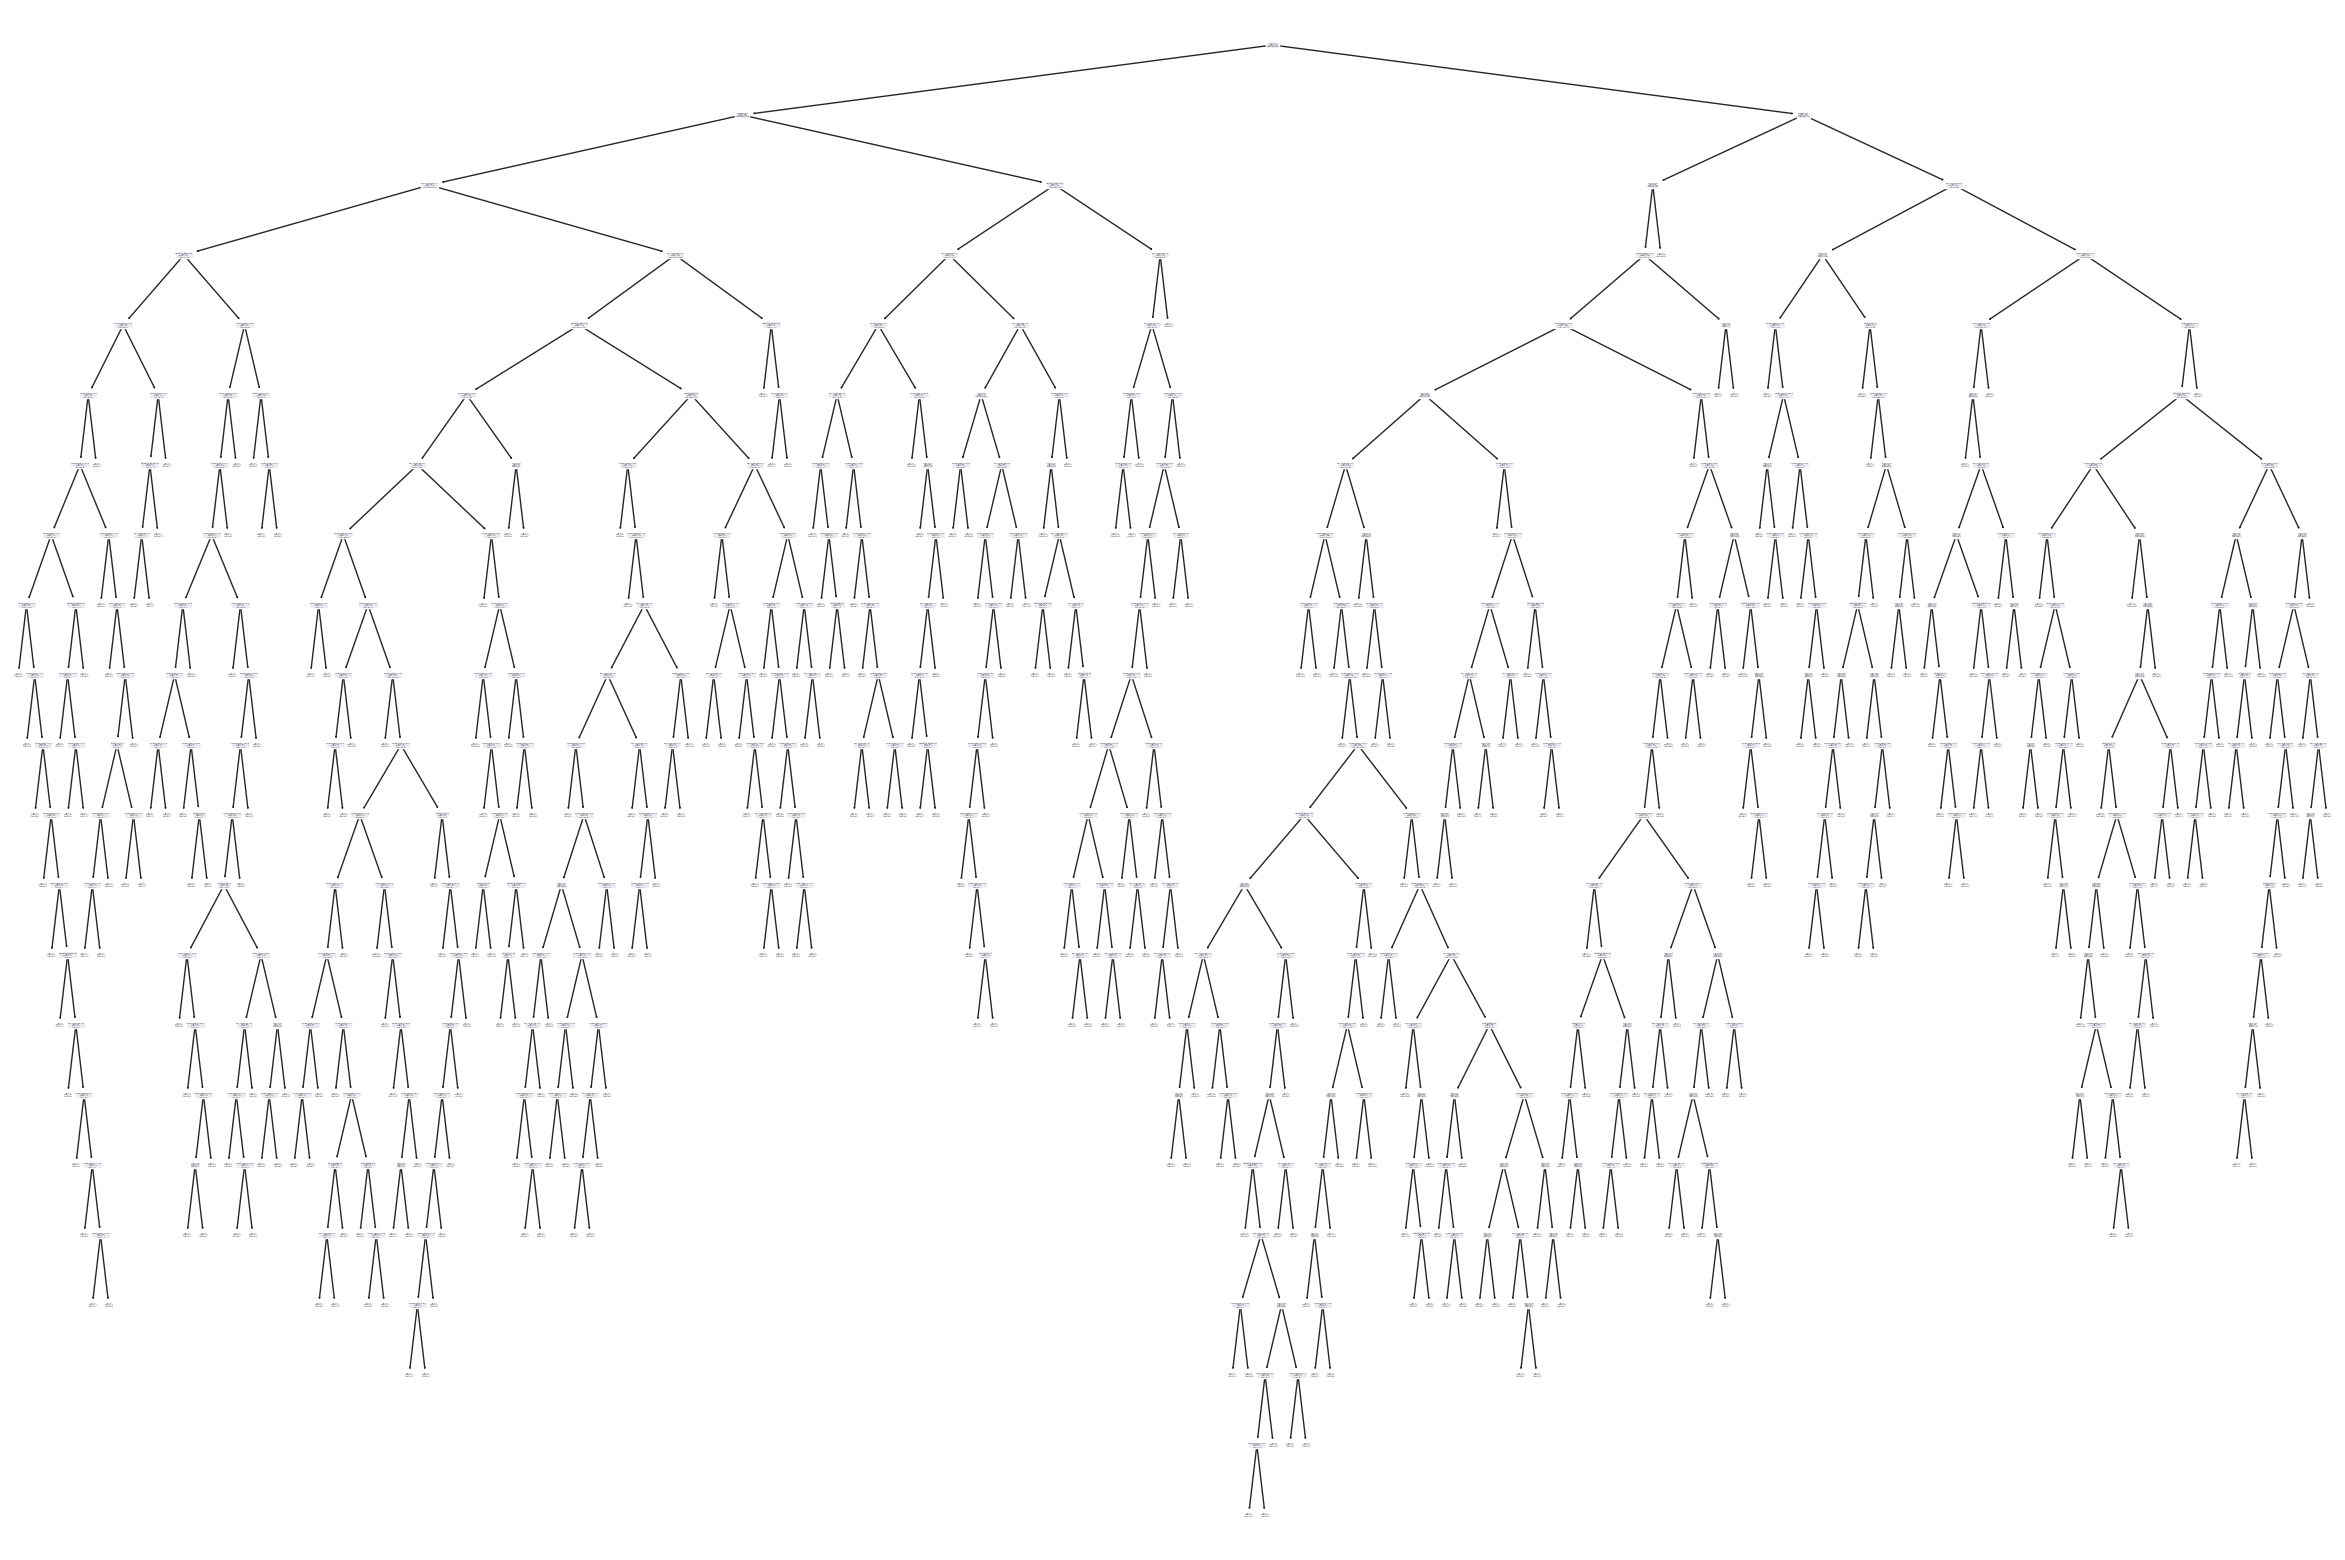

In [104]:
cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(30, 20))
plot_tree(tree_model, feature_names=cols)
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       849
           1       0.82      0.78      0.80       163

    accuracy                           0.94      1012
   macro avg       0.89      0.87      0.88      1012
weighted avg       0.94      0.94      0.94      1012

Accuracy Score: 0.9377470355731226


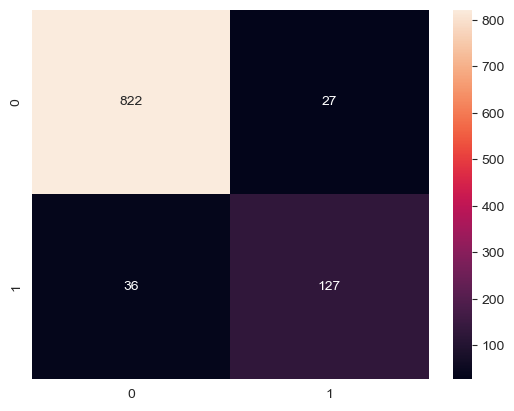

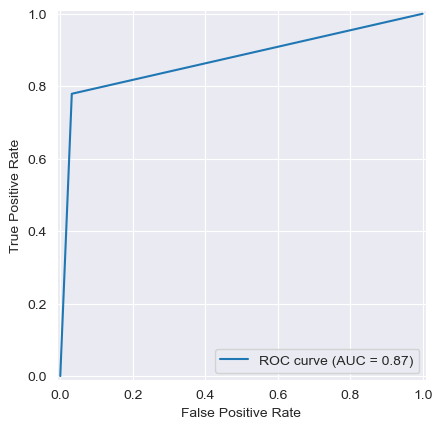

In [105]:
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       849
           1       0.86      0.78      0.82       163

    accuracy                           0.94      1012
   macro avg       0.91      0.88      0.89      1012
weighted avg       0.94      0.94      0.94      1012

Accuracy Score: 0.9436758893280632


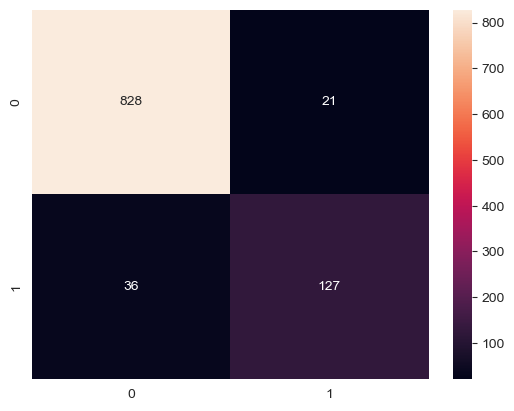

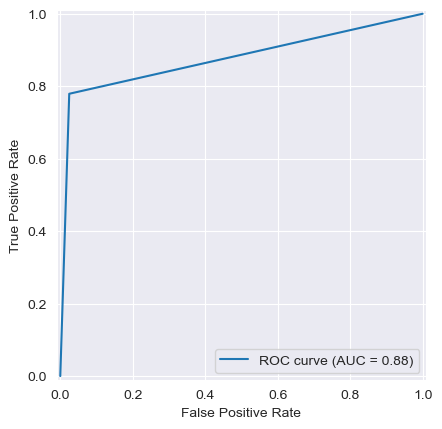

In [106]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       849
           1       0.62      0.50      0.55       163

    accuracy                           0.87      1012
   macro avg       0.77      0.72      0.74      1012
weighted avg       0.86      0.87      0.86      1012

Accuracy Score: 0.8705533596837944


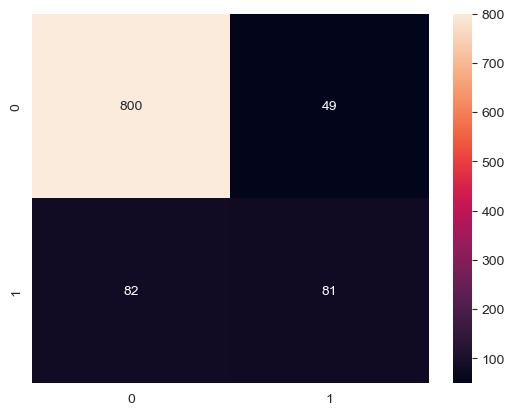

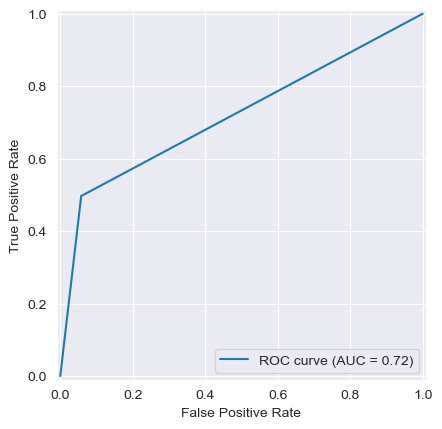

In [107]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       849
           1       0.67      0.48      0.56       163

    accuracy                           0.88      1012
   macro avg       0.79      0.72      0.74      1012
weighted avg       0.87      0.88      0.87      1012

Accuracy Score: 0.8774703557312253


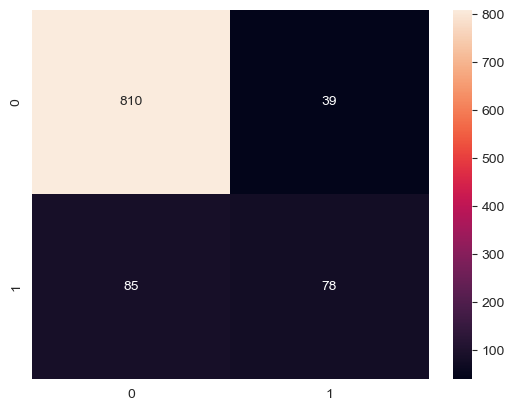

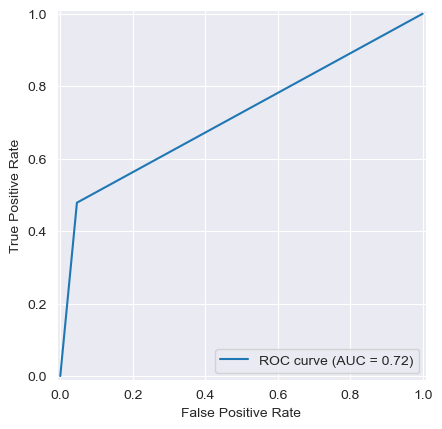

In [108]:
clf = GradientBoostingClassifier(n_estimators=9, learning_rate=1.0,
                                max_depth=1, random_state=0).fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()